In [149]:
import quandl
quandl.ApiConfig.api_key = 'your_quandl_key'

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [150]:
# Grab prices from Quandl
price_table = quandl.get_table('SHARADAR/SEP', 
                               ticker=['BAC', 'C',
                                       'F', 'GM',
                                       'AAPL', 'MSFT', 
                                       'UAL', 'AAL',
                                       'KO', 'PEP',
                                       'XOM', 'CVX',
                                       'SLB', 'HAL',
                                       'FITB', 'KEY',
                                       'GS', 'JPM',
                                       'WFC', 'AMZN', 'NFLX', 'T', 'CMCSA', 'MCD', 'WMT', 'COST',
                                       'TIF', 'INTC', 'ORCL', 'CSCO'
                                      ]
                               , paginate=True)

In [151]:
# Organize stock prices into table format
sorted_table = price_table.sort_values(by=['ticker','date'], ascending=True).copy()
tickers = sorted(list(set(sorted_table['ticker'])))
price_stock = price_table[price_table['ticker']==tickers[0]][['date','close']].sort_values(by='date', ascending=True)
price_stock.reset_index(inplace=True)

In [152]:
# Calculate daily returns and store in return_df
close_df = pd.DataFrame()
close_df['date'] = price_stock['date']
volume_df = pd.DataFrame()
close_df['date'] = price_stock['date']

for ticker in tickers:
    close_df[ticker] = list(sorted_table[sorted_table['ticker']==ticker]['close'])
    volume_ticker = 'v_' + ticker
    volume_df[volume_ticker] = list(sorted_table[sorted_table['ticker']==ticker]['volume'])

no_date_df = close_df[list(close_df.columns)[1:]]
return_df = no_date_df/no_date_df.shift(1) - 1

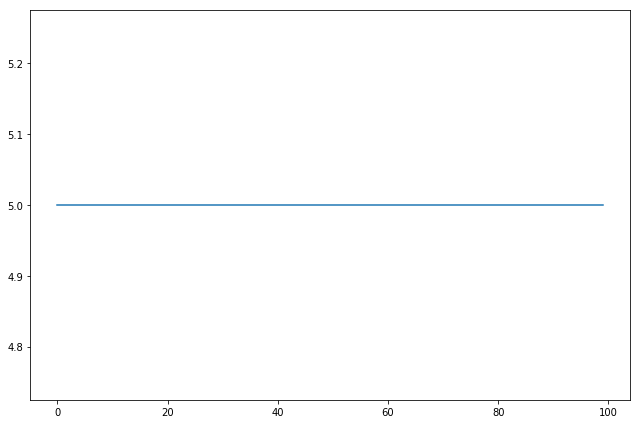

In [153]:
# Flat line plot
fig, ax = plt.subplots(figsize=(9,6))
sns.lineplot(x=range(100), y=5);
plt.tight_layout()
plt.savefig(fname='flat_line', dpi=150)

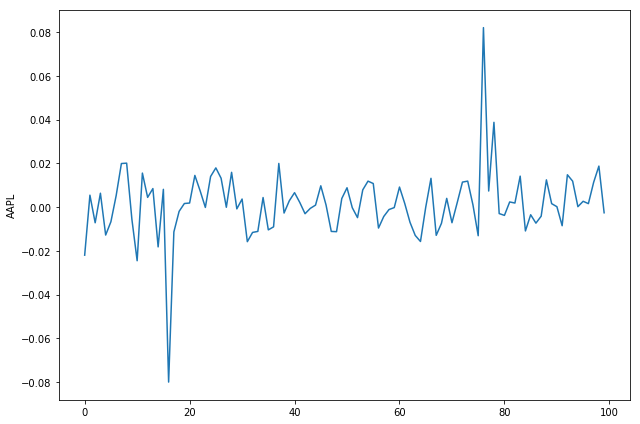

In [154]:
# AAPL stock plot
fig, ax = plt.subplots(figsize=(9,6))
sns.lineplot(x=range(100), y=pca_df['AAPL'].iloc[:100]);
plt.tight_layout()
plt.savefig(fname='stock_ret', dpi=150)

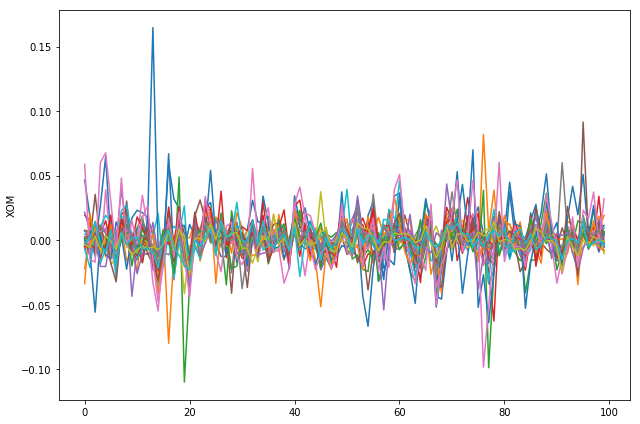

In [155]:
# Plot daily returns for all 30 stocks
fig, ax = plt.subplots(figsize=(9,6))
for i in list(pca_df.columns):
    sns.lineplot(x=range(100), y=pca_df[i].iloc[:100]);
plt.tight_layout()
plt.savefig(fname='all_stock_ret', dpi=150)

In [156]:
# Run PCA
pca = PCA(n_components=5)
pca.fit(pca_df)
components = pca.transform(pca_df)

In [157]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.38442669 0.09213306 0.09029741 0.05716346 0.04708452]
0.6711051404417957


In [158]:
# Read SPY price data in from csv file (downloaded from Yahoo Finance)
spy = pd.read_csv('spy.csv')

In [159]:
# Calculate SPY daily returns
spy_ret = (spy['Adj Close']/spy['Adj Close'].shift(1)-1)[1:]

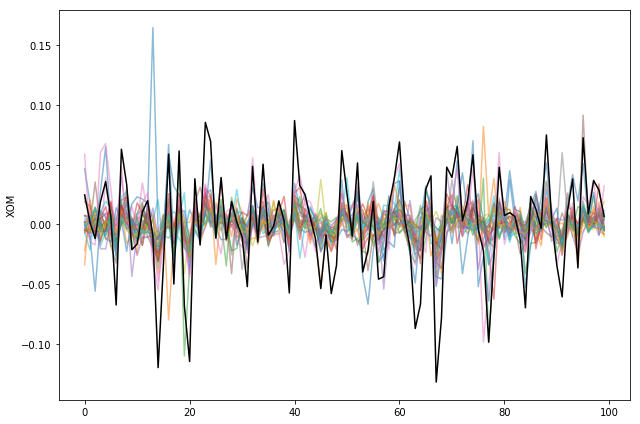

In [160]:
# Plot PCA1
fig, ax = plt.subplots(figsize=(9,6))
for i in list(pca_df.columns):
    sns.lineplot(x=range(100), y=pca_df[i].iloc[:100], alpha=0.50);
sns.lineplot(x=range(100), y=components[:100, 0], color='black');
plt.tight_layout()
plt.savefig(fname='all_stock_ret_pca1', dpi=150)

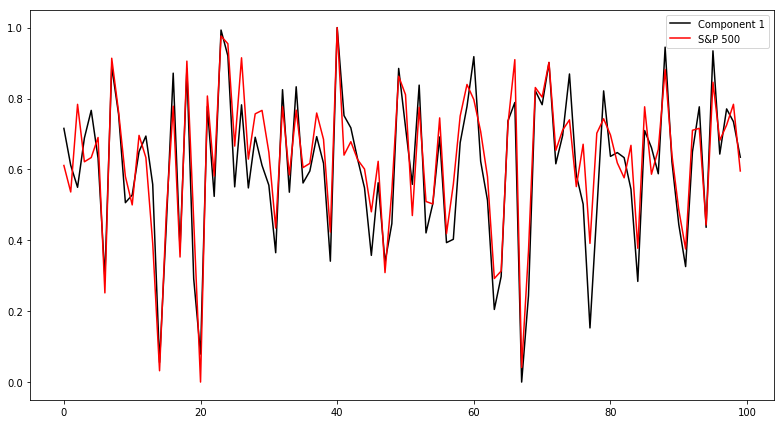

In [161]:
# Plot PCA1 vs. SPY
scaler = MinMaxScaler()
scaler.fit(components[:100, 0].reshape(-1,1))
pca1 = scaler.transform(components[:100, 0].reshape(-1,1))
scaler.fit(np.array(spy_ret[:100]).reshape(-1,1))
market = scaler.transform(np.array(spy_ret[:100]).reshape(-1,1))

fig, ax = plt.subplots(figsize=(11,6))
plt.plot(pca1, color='black', label='Component 1');
plt.plot(market, color='red', label='S&P 500');
plt.legend()
plt.tight_layout()
plt.savefig(fname='market_vs_pca1', dpi=150)

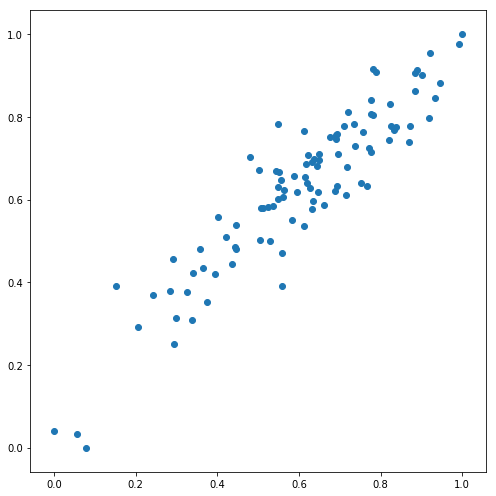

In [162]:
# Scatter plot of PCA1 vs. SPY
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(x=pca1, y=market);
plt.tight_layout()
plt.savefig(fname='market_vs_pca1_scatter', dpi=150)

In [163]:
df_corr = pd.DataFrame()
df_corr['pca1'] = [i[0] for i in pca1]
df_corr['market'] = market
df_corr.corr()

,pca1,market
pca1,1.000000,0.923381
market,0.923381,1.000000


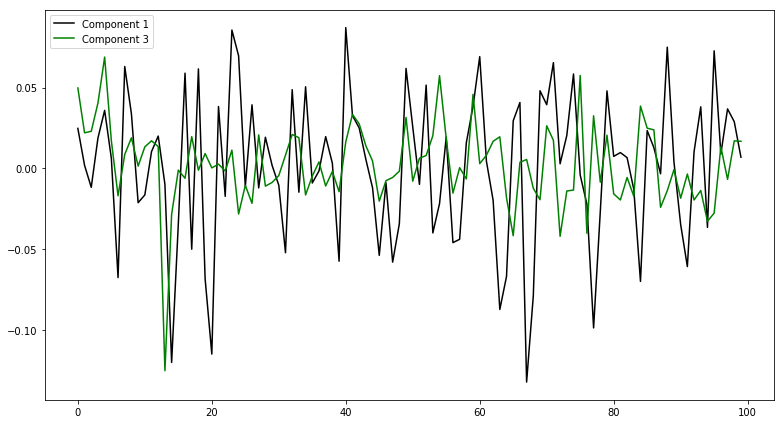

In [164]:
# Plot PCA1 and PCA3
fig, ax = plt.subplots(figsize=(11,6))
plt.plot(components[:100, 0], color='black', label='Component 1');
plt.plot(components[:100, 2], color='green', label='Component 3');
plt.legend()
plt.tight_layout()
plt.savefig(fname='pca_1_2_3', dpi=150)

In [165]:
pca_df_corr = pd.DataFrame()
pca_df_corr['pca1'] = components[:100, 0]
pca_df_corr['pca2'] = components[:100, 1]
pca_df_corr['pca3'] = components[:100, 2]
pca_df_corr.corr()

,pca1,pca2,pca3
pca1,1.000000,0.299293,0.079155
pca2,0.299293,1.000000,-0.140737
pca3,0.079155,-0.140737,1.000000
